In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


from neural_signal_data import y, s, T, N, M, a_true
from neural_signal_data import visualize_data
from neural_signal_data import visualize_estimate
from neural_signal_data import visualize_polished
from neural_signal_data import find_nonzero_entries

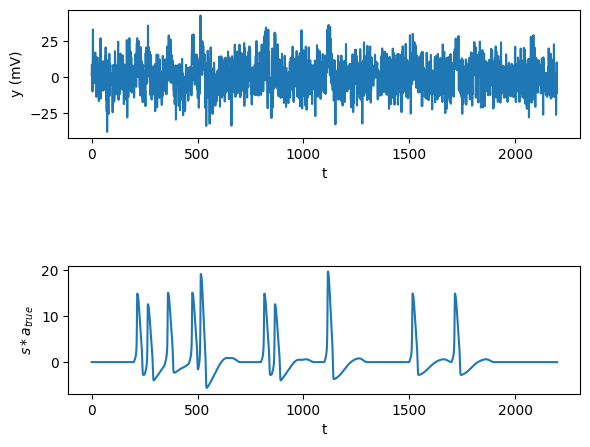

In [2]:
visualize_data()

In [2]:
# Solve part b)
a = cp.Variable(N)
lam= 2
objective = cp.Minimize(cp.sum_squares(cp.conv(s,a).flatten() - y)/(T) \
	+ lam * cp.sum(a))
constraints = [0 <= a]
prob = cp.Problem(objective, constraints)
result = prob.solve()
result

115.61490868783758

maghadir gheyr sefr a vagheyi: [ 200  250  345  460  500  800  850 1100 1500 1700]
maghadir gheyr sefr a takhmin zade shode: [ 198  242  249  345  459  499  799  849 1098 1499 1698]


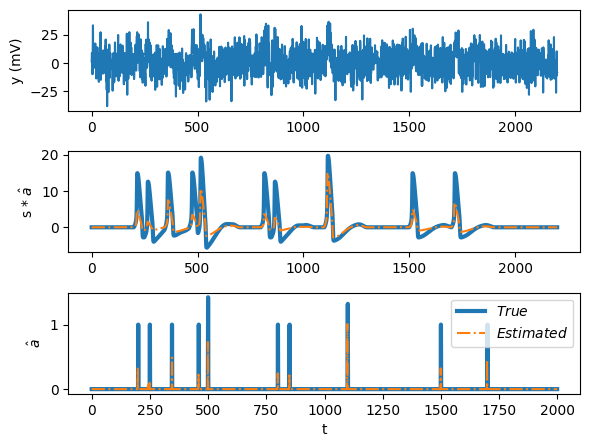

In [3]:
# Plot part b)
visualize_estimate(a.value)

print('maghadir gheyr sefr a vagheyi:',find_nonzero_entries(a_true))
print('maghadir gheyr sefr a takhmin zade shode:',find_nonzero_entries(a.value))


In [53]:
# Solve part c)
ind = np.where(a.value <=0.001)[0]
a_p = cp.Variable(N)
objective = cp.Minimize(cp.sum_squares(cp.conv(s,a_p).flatten() - y)/(T) )
constraints = [0 <= a_p, a_p[ind] == 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

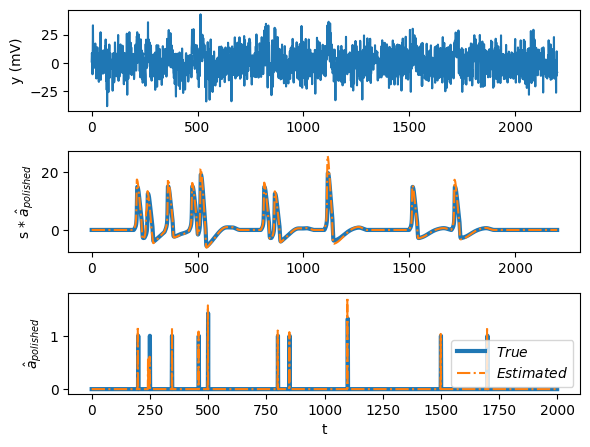

In [54]:
# Plot part c)
visualize_polished(a_p.value)
